In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_excel('./data/train_clientes.xlsx', index_col='ID_CORRELATIVO')
df_test = pd.read_excel('./data/test_clientes.xlsx', index_col='ID_CORRELATIVO')

## Data Clientes

In [4]:
x_train = df_train.drop(['ATTRITION'], axis=1)
y_train = df_train['ATTRITION']
x_test = df_test

In [5]:
# Join train and test df to aplly feature engineering
df = pd.concat([x_train, x_test])
print df.shape

(100000, 51)


In [6]:
# Split columns by type
num_cols = df.select_dtypes(exclude=['datetime', 'object']).columns.tolist()
cat_cols = [col for col in df.columns if col not in num_cols]

In [7]:
dm1 = pd.get_dummies(df[cat_cols[0]], prefix='FLAG')
dm2 = pd.get_dummies(df[cat_cols[1]], prefix='FLAG')
dm3 = pd.get_dummies(df[cat_cols[2]], prefix='FLAG')
dm4 = pd.get_dummies(df[cat_cols[3]], prefix='FLAG')

df_ = pd.concat([df, dm1, dm2, dm3, dm4], axis=1)
df_.drop(cat_cols, inplace=True, axis=1)

In [8]:
# Drop CODMES
df_.drop('CODMES', inplace=True, axis=1)
num_cols.remove('CODMES')

In [9]:
df_.isnull().sum()[df_.isnull().sum()>0]

EDAD          7677
ANTIGUEDAD    2508
dtype: int64

In [11]:
df_.fillna(-999, inplace=True)

In [10]:
x_train_ = df_.iloc[0:70000]
x_test_ = df_.iloc[70000:]

## Feature Selection

In [181]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x_train_, y_train, test_size=0.10, random_state=0)

dtrain = xgb.DMatrix(xtrain, label=ytrain)
dtest = xgb.DMatrix(xtest, label=ytest)


params = {
    'max_depth': 9,
    'min_child_weight': 6,
    'eta':.01,
    'subsample': 1,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'eval_metric':'logloss'
}

xgb_model = xgb.train(params, 
                      dtrain,
                      num_boost_round=999, 
                      early_stopping_rounds=10,
                      evals=[(dtest, "Test")])

[0]	Test-logloss:0.687325
Will train until Test-logloss hasn't improved in 10 rounds.
[1]	Test-logloss:0.681621
[2]	Test-logloss:0.676112
[3]	Test-logloss:0.67057
[4]	Test-logloss:0.66484
[5]	Test-logloss:0.659318
[6]	Test-logloss:0.653764
[7]	Test-logloss:0.648635
[8]	Test-logloss:0.64332
[9]	Test-logloss:0.638109
[10]	Test-logloss:0.633019
[11]	Test-logloss:0.627978
[12]	Test-logloss:0.623645
[13]	Test-logloss:0.618787
[14]	Test-logloss:0.61434
[15]	Test-logloss:0.609683
[16]	Test-logloss:0.605039
[17]	Test-logloss:0.600476
[18]	Test-logloss:0.596129
[19]	Test-logloss:0.592054
[20]	Test-logloss:0.587738
[21]	Test-logloss:0.583562
[22]	Test-logloss:0.579606
[23]	Test-logloss:0.576115
[24]	Test-logloss:0.572336
[25]	Test-logloss:0.568654
[26]	Test-logloss:0.565038
[27]	Test-logloss:0.561147
[28]	Test-logloss:0.557386
[29]	Test-logloss:0.553677
[30]	Test-logloss:0.549988
[31]	Test-logloss:0.546428
[32]	Test-logloss:0.543406
[33]	Test-logloss:0.539875
[34]	Test-logloss:0.536471
[35]	Test

[296]	Test-logloss:0.305041
[297]	Test-logloss:0.304913
[298]	Test-logloss:0.304781
[299]	Test-logloss:0.304663
[300]	Test-logloss:0.304517
[301]	Test-logloss:0.304399
[302]	Test-logloss:0.304291
[303]	Test-logloss:0.304194
[304]	Test-logloss:0.304118
[305]	Test-logloss:0.303993
[306]	Test-logloss:0.30393
[307]	Test-logloss:0.303832
[308]	Test-logloss:0.303723
[309]	Test-logloss:0.303613
[310]	Test-logloss:0.303502
[311]	Test-logloss:0.303387
[312]	Test-logloss:0.303305
[313]	Test-logloss:0.303242
[314]	Test-logloss:0.303138
[315]	Test-logloss:0.303031
[316]	Test-logloss:0.302925
[317]	Test-logloss:0.302845
[318]	Test-logloss:0.302746
[319]	Test-logloss:0.302654
[320]	Test-logloss:0.302578
[321]	Test-logloss:0.302452
[322]	Test-logloss:0.30235
[323]	Test-logloss:0.30224
[324]	Test-logloss:0.30213
[325]	Test-logloss:0.302067
[326]	Test-logloss:0.301975
[327]	Test-logloss:0.30188
[328]	Test-logloss:0.301823
[329]	Test-logloss:0.301749
[330]	Test-logloss:0.301675
[331]	Test-logloss:0.3016

[590]	Test-logloss:0.294666
[591]	Test-logloss:0.294663
[592]	Test-logloss:0.294658
[593]	Test-logloss:0.294651
[594]	Test-logloss:0.294633
[595]	Test-logloss:0.294634
[596]	Test-logloss:0.294628
[597]	Test-logloss:0.294621
[598]	Test-logloss:0.294611
[599]	Test-logloss:0.294607
[600]	Test-logloss:0.294601
[601]	Test-logloss:0.294598
[602]	Test-logloss:0.294594
[603]	Test-logloss:0.294594
[604]	Test-logloss:0.294585
[605]	Test-logloss:0.294575
[606]	Test-logloss:0.294565
[607]	Test-logloss:0.294555
[608]	Test-logloss:0.294565
[609]	Test-logloss:0.29456
[610]	Test-logloss:0.294551
[611]	Test-logloss:0.294548
[612]	Test-logloss:0.294541
[613]	Test-logloss:0.294541
[614]	Test-logloss:0.294532
[615]	Test-logloss:0.294521
[616]	Test-logloss:0.294522
[617]	Test-logloss:0.294495
[618]	Test-logloss:0.294494
[619]	Test-logloss:0.294477
[620]	Test-logloss:0.29448
[621]	Test-logloss:0.29448
[622]	Test-logloss:0.294467
[623]	Test-logloss:0.294466
[624]	Test-logloss:0.294454
[625]	Test-logloss:0.29

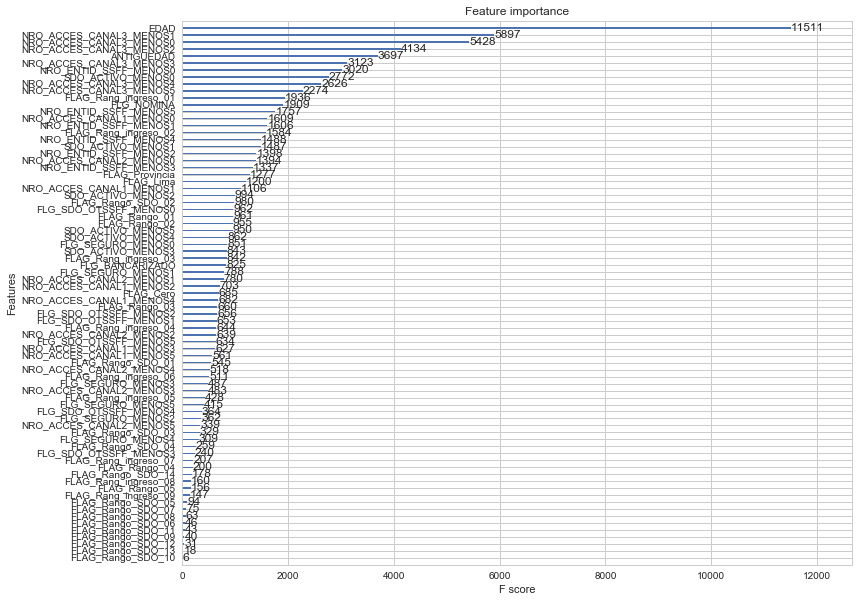

In [150]:
fig, axs = plt.subplots(figsize=(12,10))
plot_importance(xgb_model, ax=axs)

In [151]:
xgb_feats = xgb_model.get_score().keys()
xgb_import = xgb_model.get_score().values()

xgb_importances = pd.DataFrame({'Features': xgb_feats, 'Importances': xgb_import})
xgb_importances.sort_values(by='Importances', ascending=False, inplace=True)

In [190]:
loglist = []

for i in reversed(range(67,78)):
    print '# Feats: {}'.format(i)
    beast_feats = xgb_importances['Features'][:i]
    dtrain = xgb.DMatrix(xtrain[beast_feats], label=ytrain)
    dtest = xgb.DMatrix(xtest[beast_feats], label=ytest)

    xgb_model2 = xgb.train(params, 
                          dtrain,
                          num_boost_round=999, 
                          early_stopping_rounds=10,
                          evals=[(dtest, "Test")],
                          verbose_eval='False')
    
    loglist.append(xgb_model2.best_score)

print 'Best logloss: {}'.format(np.min(loglist))

# Feats: 77
Will train until Test-logloss hasn't improved in 10 rounds.


KeyboardInterrupt: 

In [191]:
test_log = []
    
for i in reversed(range(72,78)):
    print '# Feats: {}'.format(i)
    beast_feats = xgb_importances['Features'][:i]
    dtrain = xgb.DMatrix(x_train_[beast_feats], label=y_train)
    
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=1000,
        early_stopping_rounds=10,
        nfold=5,
        seed=0
    )
    log = cv_results['test-logloss-mean'].min()
    print 'test-logloss-mean: {}'.format(log)
    test_log.append(log)

print np.min(test_log)

# Feats: 77


KeyboardInterrupt: 

## Modelado clientes

In [12]:
from sklearn.cross_validation import StratifiedKFold
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [14]:
# Add eval metric xgboost , catboost, lgbm

X, y, X_submission = x_train_, y_train, x_test_

clfs = [XGBClassifier(
            learning_rate=0.01,
            n_estimators=1290,
            max_depth=7,
            min_child_weight=5,
            gamma=0,
            subsample=0.9,
            colsample_bytree=0.6,
            reg_alpha=1,
            objective='binary:logistic',
            nthread=-1,
            scale_pos_weight=1,
            seed=1234
        ),
        CatBoostClassifier(verbose=False, learning_rate=0.01, depth=7, iterations=500, random_seed=0),
        LGBMClassifier(objective='binary', learning_rate=0.01, n_estimators=500, random_state=0)
]

print "Creating train and test sets for blending."

dataset_blend_train = np.zeros((X.shape[0], len(clfs)))
dataset_blend_test = np.zeros((X_submission.shape[0], len(clfs)))

skf = StratifiedKFold(y, 5, random_state=0)

for j, clf in enumerate(clfs):
    print 'Model {0} : {1}'.format(j, clf)
    dataset_blend_test_j = np.zeros((X_submission.shape[0], len(skf)))
    for i, (train, test) in enumerate(skf):
        print "Fold", i
        X_train = X.iloc[train]
        Y_train = y.iloc[train]
        X_test = X.iloc[test]
        Y_test = y.iloc[test]
        if j == 0:
            clf.fit(X_train, Y_train, eval_metric='logloss')
            y_submission = clf.predict_proba(X_test)[:, 1]
        elif j == 1:
            clf.fit(X_train, Y_train, logging_level='Silent')
            y_submission = clf.predict_proba(X_test)[:, 1]
        else:
            clf.fit(X_train, Y_train)
            y_submission = clf.predict_proba(X_test)[:, 1]
        dataset_blend_train[test, j] = y_submission
        dataset_blend_test_j[:, i] = clf.predict_proba(X_submission)[:, 1]
    dataset_blend_test[:, j] = dataset_blend_test_j.mean(1)

Creating train and test sets for blending.
Model 0 : XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=7,
       min_child_weight=5, missing=None, n_estimators=1290, nthread=-1,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=1234, silent=True, subsample=0.9)
Fold 0


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=7,
       min_child_weight=5, missing=None, n_estimators=1290, nthread=-1,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=1234, silent=True, subsample=0.9)

Fold 1


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=7,
       min_child_weight=5, missing=None, n_estimators=1290, nthread=-1,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=1234, silent=True, subsample=0.9)

Fold 2


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=7,
       min_child_weight=5, missing=None, n_estimators=1290, nthread=-1,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=1234, silent=True, subsample=0.9)

Fold 3


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=7,
       min_child_weight=5, missing=None, n_estimators=1290, nthread=-1,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=1234, silent=True, subsample=0.9)

Fold 4


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=7,
       min_child_weight=5, missing=None, n_estimators=1290, nthread=-1,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=1234, silent=True, subsample=0.9)

Model 1 : <catboost.core.CatBoostClassifier object at 0x000000000BACA668>
Fold 0


Fold 1


Fold 2


Fold 3


Fold 4


Model 2 : LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.01,
        max_bin=255, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=500,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=0,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)
Fold 0


LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.01,
        max_bin=255, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=500,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=0,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

Fold 1


LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.01,
        max_bin=255, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=500,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=0,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

Fold 2


LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.01,
        max_bin=255, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=500,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=0,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

Fold 3


LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.01,
        max_bin=255, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=500,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=0,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

Fold 4


LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.01,
        max_bin=255, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=500,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=0,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

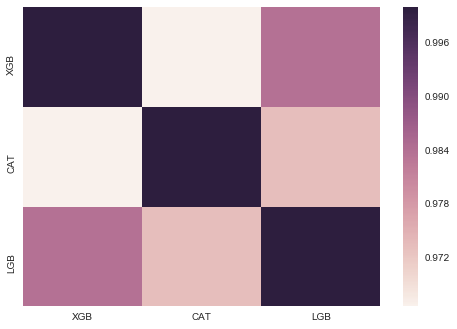

In [18]:
import seaborn as sns
basemodel_pred = pd.DataFrame(data=dataset_blend_train, columns=['XGB', 'CAT', 'LGB'])

sns.heatmap(basemodel_pred.corr())

In [21]:
xgb_model = XGBClassifier(learning_rate=0.01, 
                          colsample_bytree=0.6,
                          gamma=0.4,
                          max_depth=7,
                          min_child_weight=5,
                          n_estimators=500, 
                          nthread=-1,
                          objective='binary:logistic',
                          seed=0,
                          subsample=0.9)
xgb_model.fit(dataset_blend_train, y, eval_metric='logloss')
y_submission = xgb_model.predict_proba(dataset_blend_test)[:, 1]

submission = pd.DataFrame()
submission['ID_CORRELATIVO'] = X_submission.index
submission['ATTRITION'] = y_submission

submission.to_csv('./data/stack_sub_05.csv', index=False)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0.4, learning_rate=0.01, max_delta_step=0, max_depth=7,
       min_child_weight=5, missing=None, n_estimators=500, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.9)

In [ ]:
# New Base learners

xgb1 (rawx)
xgb2 (feat cat vals)
light
cat
(All must be uncorrelated models to improve the performance)